# **Import Libraries**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import math

## **Creating dataset**

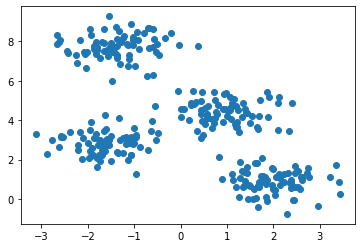

In [218]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [219]:
max_x0 = max(X[:, 0])
max_x1 = max(X[:, 1])
min_x0 = min(X[:, 0])
min_x1 = min(X[:, 1])
print(max_x0, max_x1, min_x0, min_x1)

3.437617540043243 9.282932223367844 -3.12240735601995 -0.7658919939180533


In [0]:
clusters = 4

## **Taking Random Points as cluster centers**

In [0]:
points = []
for _ in range(clusters):
  x = random.randrange(int(min_x0), int(max_x0))
  y = random.randrange(int(min_x1), int(max_x1))
  while([x,y] in points):
    x = random.randrange(int(min_x0), int(max_x0))
    y = random.randrange(int(min_x1), int(max_x1))
  points.append([x, y])

## **Plotting Function**

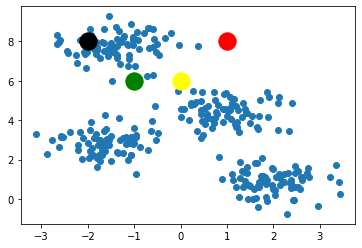

In [222]:
def plot(points):
  XX = []
  YY = []
  for a, b in points:
    XX.append(a)
    YY.append(b)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(XX[0], YY[0], s=300, c='red')
  plt.scatter(XX[1], YY[1], s=300, c='black')
  plt.scatter(XX[2], YY[2], s=300, c='green')
  plt.scatter(XX[3], YY[3], s=300, c='yellow')
  plt.show()
plot(points)

In [223]:
points

[[1, 8], [-2, 8], [-1, 6], [0, 6]]

In [0]:
epochs = 10

## **Function To get Euclidian distance**

In [0]:
def getdist(x1, y1, x2, y2):
  a = x2 - x1
  b = y2 - y1
  a = a*a
  b = b*b
  c = math.sqrt(a+b)
  return c

## **Update Function for updating cluster centers**

In [0]:
def getavg(l):
  x = 0
  y = 0
  cnt = 0
  for a, b in l:
    x += a
    y += b
    cnt += 1
  if(cnt == 0):
    return [0,0]
  x = x / cnt
  y = y / cnt
  return [x, y]

## **Training Function**

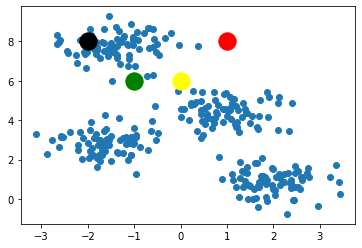

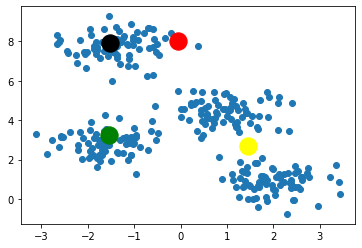

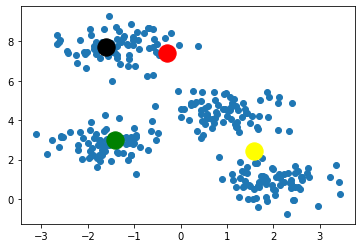

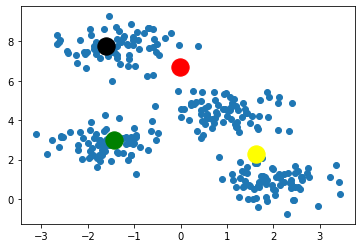

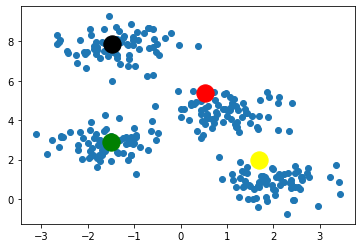

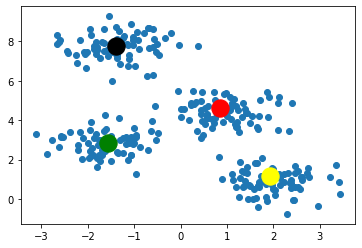

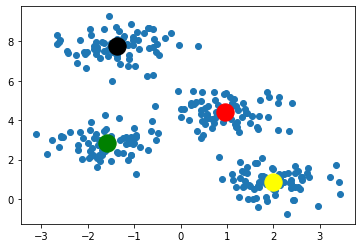

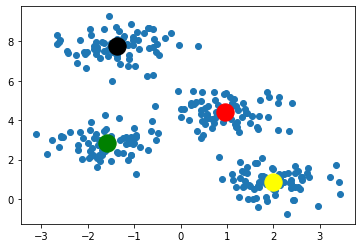

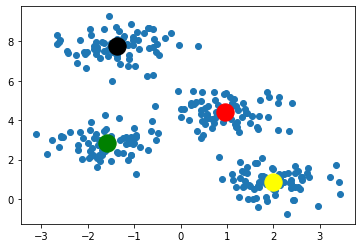

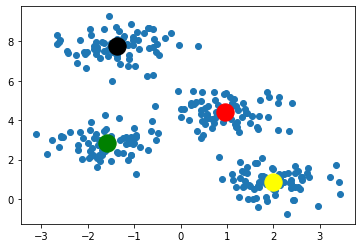

In [227]:

for epoch in range(epochs):
  plot(points)
  seq = dict()
  for p in X:
    x = p[0]
    y = p[1]
    mind = 1e9
    ind = -1
    curr = 0
    for x2, y2 in points:
      curr += 1
      d = getdist(x, y, x2, y2)
      if(d < mind):
        mind = d
        ind = curr
    seq.setdefault(ind, []).append([x, y])
  for i in range(1, clusters+1):
    x, y = getavg(seq[i])
    points[i-1] = [x, y]


## **Final cluster centers for prediction**

Accuracy is around 98.05 percent.

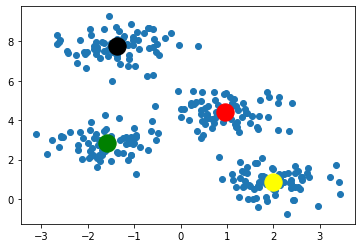

In [233]:
plot(points)

## **Prediction Function**

In [0]:
def predict(x, y):
  mind = 1e9
  ind = -1
  curr = 0
  for x2,y2 in points:
    curr += 1
    d = getdist(x, y, x2, y2)
    if(d < mind):
      mind = d
      ind = curr
  return ind

In [243]:
x = random.randrange(int(min_x0), int(max_x0))
y = random.randrange(int(min_x1), int(max_x1))
ans = predict(x, y)
mapping = {}
mapping[1] = "RED"
mapping[2] = "Black"
mapping[3] = "Green"
mapping[4] = "Yellow"
print("Point ({},{}) belongs to Cluster number : {}".format(x, y, mapping[ans]))

Point (-3,7) belongs to Cluster number : Black


## **Predicted Plot**
Blue point represents value to predicted.
Accuracy is around 98 percent.

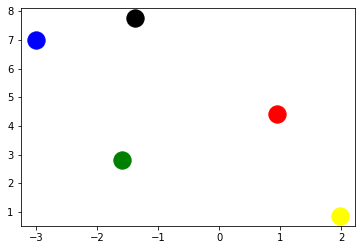

In [244]:
XX = []
YY = []
for a, b in points:
  XX.append(a)
  YY.append(b)
plt.scatter(x, y, s=300, c = 'blue')
plt.scatter(XX[0], YY[0], s=300, c='red')
plt.scatter(XX[1], YY[1], s=300, c='black')
plt.scatter(XX[2], YY[2], s=300, c='green')
plt.scatter(XX[3], YY[3], s=300, c='yellow')
plt.show()